In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('Global Terrorism.csv', encoding = 'latin-1')
df.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_14624\3267406969.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Global Terrorism.csv', encoding = 'latin-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df = df[['iyear', 'imonth', 'iday', 'country_txt', 'nkill']]

In [4]:
df

,iyear,imonth,iday,country_txt,nkill
0,1970,7,2,Dominican Republic,1.0
1,1970,0,0,Mexico,0.0
2,1970,1,0,Philippines,1.0
3,1970,1,0,Greece,NaN
4,1970,1,0,Japan,NaN
...,...,...,...,...,...
181686,2017,12,31,Somalia,1.0
181687,2017,12,31,Syria,2.0
181688,2017,12,31,Philippines,0.0
181689,2017,12,31,India,0.0


In [5]:
df = df[(df != 0).all(axis=1)]
df.dropna(inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14624\71712985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82919 entries, 0 to 181687
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   iyear        82919 non-null  int64  
 1   imonth       82919 non-null  int64  
 2   iday         82919 non-null  int64  
 3   country_txt  82919 non-null  object 
 4   nkill        82919 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.8+ MB


In [7]:
df.isnull().sum()

iyear          0
imonth         0
iday           0
country_txt    0
nkill          0
dtype: int64

In [8]:
df = df[(df != 0).all(axis=1)]
df.dropna(inplace=True)

In [9]:
df

,iyear,imonth,iday,country_txt,nkill
0,1970,7,2,Dominican Republic,1.0
16,1970,1,11,Ethiopia,1.0
25,1970,1,20,Guatemala,1.0
59,1970,2,10,West Germany (FRG),1.0
62,1970,2,13,West Germany (FRG),7.0
...,...,...,...,...,...
181679,2017,12,31,Iraq,13.0
181681,2017,12,31,Philippines,1.0
181683,2017,12,31,Afghanistan,6.0
181686,2017,12,31,Somalia,1.0


In [10]:
df['date'] = pd.to_datetime(df[['iyear', 'imonth', 'iday']].astype(str).agg('-'.join, axis=1))

In [11]:
df.head()

,iyear,imonth,iday,country_txt,nkill,date
0,1970,7,2,Dominican Republic,1.0,1970-07-02
16,1970,1,11,Ethiopia,1.0,1970-01-11
25,1970,1,20,Guatemala,1.0,1970-01-20
59,1970,2,10,West Germany (FRG),1.0,1970-02-10
62,1970,2,13,West Germany (FRG),7.0,1970-02-13


In [12]:
df.set_index('date', inplace=True)

In [13]:
df.head()

,iyear,imonth,iday,country_txt,nkill
date,,,,,
1970-07-02,1970,7,2,Dominican Republic,1.0
1970-01-11,1970,1,11,Ethiopia,1.0
1970-01-20,1970,1,20,Guatemala,1.0
1970-02-10,1970,2,10,West Germany (FRG),1.0
1970-02-13,1970,2,13,West Germany (FRG),7.0


In [14]:
df.drop(['iyear', 'imonth', 'iday'], axis=1, inplace=True)
df.head()

,country_txt,nkill
date,,
1970-07-02,Dominican Republic,1.0
1970-01-11,Ethiopia,1.0
1970-01-20,Guatemala,1.0
1970-02-10,West Germany (FRG),1.0
1970-02-13,West Germany (FRG),7.0


In [15]:
df_india = df[df['country_txt'] == 'India']

In [16]:
df_india['nkill']

date
1975-01-02    4.0
1979-01-14    3.0
1979-04-26    4.0
1979-06-14    1.0
1979-07-01    2.0
             ... 
2017-12-19    1.0
2017-12-19    1.0
2017-12-21    1.0
2017-12-28    1.0
2017-12-31    8.0
Name: nkill, Length: 5320, dtype: float64

In [17]:
df_india['nkill1'] = df_india['nkill'].shift(1)
df_india['nkill2'] = df_india['nkill'].shift(2)
df_india['nkill3'] = df_india['nkill'].shift(3)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14624\4257621098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india['nkill1'] = df_india['nkill'].shift(1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14624\4257621098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india['nkill2'] = df_india['nkill'].shift(2)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14624\4257621098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [18]:
df_india

,country_txt,nkill,nkill1,nkill2,nkill3
date,,,,,
1975-01-02,India,4.0,NaN,NaN,NaN
1979-01-14,India,3.0,4.0,NaN,NaN
1979-04-26,India,4.0,3.0,4.0,NaN
1979-06-14,India,1.0,4.0,3.0,4.0
1979-07-01,India,2.0,1.0,4.0,3.0
...,...,...,...,...,...
2017-12-19,India,1.0,2.0,1.0,1.0
2017-12-19,India,1.0,1.0,2.0,1.0
2017-12-21,India,1.0,1.0,1.0,2.0


In [19]:
df_india.dropna(inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14624\3480727508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india.dropna(inplace=True)


In [20]:
df_india

,country_txt,nkill,nkill1,nkill2,nkill3
date,,,,,
1979-06-14,India,1.0,4.0,3.0,4.0
1979-07-01,India,2.0,1.0,4.0,3.0
1979-08-08,India,1.0,2.0,1.0,4.0
1979-08-19,India,1.0,1.0,2.0,1.0
1979-08-20,India,1.0,1.0,1.0,2.0
...,...,...,...,...,...
2017-12-19,India,1.0,2.0,1.0,1.0
2017-12-19,India,1.0,1.0,2.0,1.0
2017-12-21,India,1.0,1.0,1.0,2.0


In [21]:
df_india.tail()

,country_txt,nkill,nkill1,nkill2,nkill3
date,,,,,
2017-12-19,India,1.0,2.0,1.0,1.0
2017-12-19,India,1.0,1.0,2.0,1.0
2017-12-21,India,1.0,1.0,1.0,2.0
2017-12-28,India,1.0,1.0,1.0,1.0
2017-12-31,India,8.0,1.0,1.0,1.0


In [22]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [23]:
X = df_india[['nkill1', 'nkill2', 'nkill3']]
y = df_india['nkill']

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
xgb_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100)

In [26]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
y_pred = xgb_model.predict(X_val)

In [28]:
mse = mean_squared_error(y_val, y_pred)
rmse = mse**0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 7.159571598677947


In [29]:
df_india['y_val'] = y
df_india['y_pred'] = xgb_model.predict(X)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14624\1485578666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india['y_val'] = y
C:\Users\Admin\AppData\Local\Temp\ipykernel_14624\1485578666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india['y_pred'] = xgb_model.predict(X)


In [51]:
df_india[["y_pred"]].max()

y_pred    78.14547
dtype: float32

In [30]:
df_india

,country_txt,nkill,nkill1,nkill2,nkill3,y_val,y_pred
date,,,,,,,
1979-06-14,India,1.0,4.0,3.0,4.0,1.0,4.689739
1979-07-01,India,2.0,1.0,4.0,3.0,2.0,3.672956
1979-08-08,India,1.0,2.0,1.0,4.0,1.0,4.173261
1979-08-19,India,1.0,1.0,2.0,1.0,1.0,2.186632
1979-08-20,India,1.0,1.0,1.0,2.0,1.0,2.308208
...,...,...,...,...,...,...,...
2017-12-19,India,1.0,2.0,1.0,1.0,1.0,2.745356
2017-12-19,India,1.0,1.0,2.0,1.0,1.0,2.186632
2017-12-21,India,1.0,1.0,1.0,2.0,1.0,2.308208


In [31]:
df1 = df_india[['nkill']]
df2 = df_india[['y_pred']]
df1.index = pd.to_datetime(df1.index)
df2.index = pd.to_datetime(df2.index)

In [32]:
df1 = df1.sort_index()
df2 = df2.sort_index()

In [52]:
df2.max()

y_pred    78.14547
dtype: float32

In [33]:
print(df1.index.min(), df1.index.max())


1979-06-14 00:00:00 2017-12-31 00:00:00


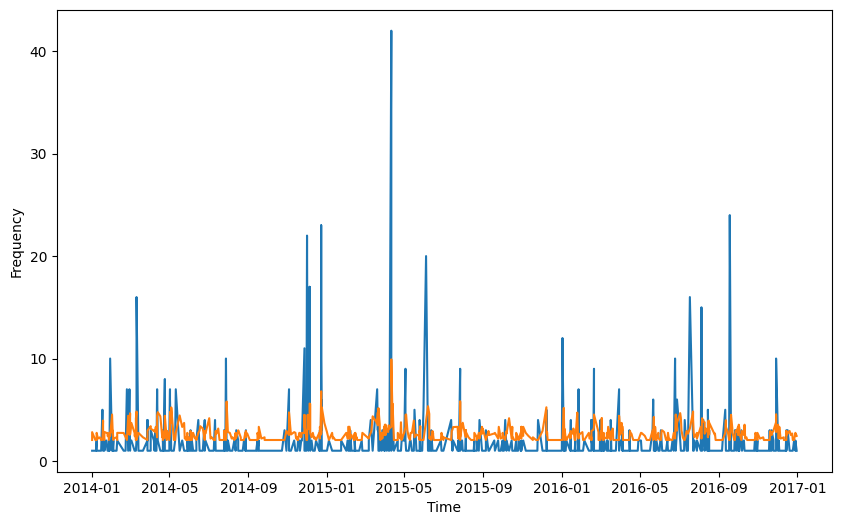

In [34]:
plt.figure(figsize=(10,6))

# Plot the counts
plt.plot(df1.loc['2014-01-01':'2017-01-01'], label='Original')
plt.plot(df2.loc['2014-01-01':'2017-01-01'], label='Forecast (Average)')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [35]:
df_india

,country_txt,nkill,nkill1,nkill2,nkill3,y_val,y_pred
date,,,,,,,
1979-06-14,India,1.0,4.0,3.0,4.0,1.0,4.689739
1979-07-01,India,2.0,1.0,4.0,3.0,2.0,3.672956
1979-08-08,India,1.0,2.0,1.0,4.0,1.0,4.173261
1979-08-19,India,1.0,1.0,2.0,1.0,1.0,2.186632
1979-08-20,India,1.0,1.0,1.0,2.0,1.0,2.308208
...,...,...,...,...,...,...,...
2017-12-19,India,1.0,2.0,1.0,1.0,1.0,2.745356
2017-12-19,India,1.0,1.0,2.0,1.0,1.0,2.186632
2017-12-21,India,1.0,1.0,1.0,2.0,1.0,2.308208


In [36]:
sample = df_india.shift(1000).iloc[-1000:]
sample

,country_txt,nkill,nkill1,nkill2,nkill3,y_val,y_pred
date,,,,,,,
2013-11-08,India,1.0,1.0,2.0,2.0,1.0,2.447980
2013-11-08,India,1.0,1.0,1.0,2.0,1.0,2.308208
2013-11-10,India,1.0,1.0,1.0,1.0,1.0,2.046860
2013-11-11,India,1.0,1.0,1.0,1.0,1.0,2.046860
2013-11-12,India,1.0,1.0,1.0,1.0,1.0,2.046860
...,...,...,...,...,...,...,...
2017-12-19,India,7.0,1.0,3.0,2.0,7.0,2.902312
2017-12-19,India,5.0,7.0,1.0,3.0,5.0,4.741209
2017-12-21,India,1.0,5.0,7.0,1.0,1.0,4.502506


In [37]:
days = sample.index + pd.DateOffset(days=1000)
days

DatetimeIndex(['2016-08-04', '2016-08-04', '2016-08-06', '2016-08-07',
               '2016-08-08', '2016-08-09', '2016-08-12', '2016-08-15',
               '2016-08-19', '2016-08-21',
               ...
               '2020-09-07', '2020-09-10', '2020-09-10', '2020-09-13',
               '2020-09-13', '2020-09-14', '2020-09-14', '2020-09-16',
               '2020-09-23', '2020-09-26'],
              dtype='datetime64[ns]', name='date', length=1000, freq=None)

In [38]:
sample.set_index(days, inplace=True)

In [39]:
sample

,country_txt,nkill,nkill1,nkill2,nkill3,y_val,y_pred
date,,,,,,,
2016-08-04,India,1.0,1.0,2.0,2.0,1.0,2.447980
2016-08-04,India,1.0,1.0,1.0,2.0,1.0,2.308208
2016-08-06,India,1.0,1.0,1.0,1.0,1.0,2.046860
2016-08-07,India,1.0,1.0,1.0,1.0,1.0,2.046860
2016-08-08,India,1.0,1.0,1.0,1.0,1.0,2.046860
...,...,...,...,...,...,...,...
2020-09-14,India,7.0,1.0,3.0,2.0,7.0,2.902312
2020-09-14,India,5.0,7.0,1.0,3.0,5.0,4.741209
2020-09-16,India,1.0,5.0,7.0,1.0,1.0,4.502506


In [40]:
sample['y_pred'] = xgb_model.predict(sample[['nkill1', 'nkill2', 'nkill3']])

In [41]:
forecast_df = pd.concat([sample, df2])
forecast_df.dropna(inplace=True)
forecast_df

,country_txt,nkill,nkill1,nkill2,nkill3,y_val,y_pred
date,,,,,,,
2016-08-04,India,1.0,1.0,2.0,2.0,1.0,2.447980
2016-08-04,India,1.0,1.0,1.0,2.0,1.0,2.308208
2016-08-06,India,1.0,1.0,1.0,1.0,1.0,2.046860
2016-08-07,India,1.0,1.0,1.0,1.0,1.0,2.046860
2016-08-08,India,1.0,1.0,1.0,1.0,1.0,2.046860
...,...,...,...,...,...,...,...
2020-09-14,India,7.0,1.0,3.0,2.0,7.0,2.902312
2020-09-14,India,5.0,7.0,1.0,3.0,5.0,4.741209
2020-09-16,India,1.0,5.0,7.0,1.0,1.0,4.502506


In [46]:
forecast_df.index = pd.to_datetime(forecast_df.index)
forecast_df = forecast_df.sort_index()

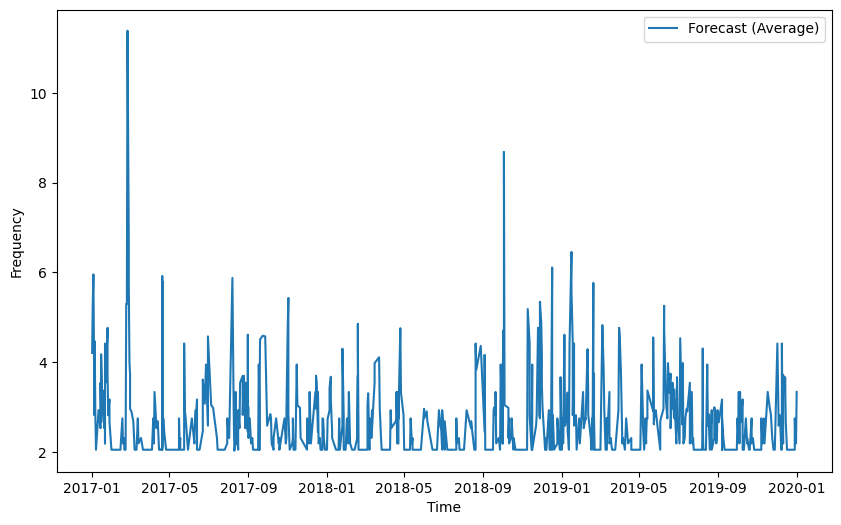

In [48]:

plt.figure(figsize=(10,6))

plt.plot(forecast_df[['y_pred']]['2017-01-01':'2020-01-01'], label='Forecast (Average)')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()


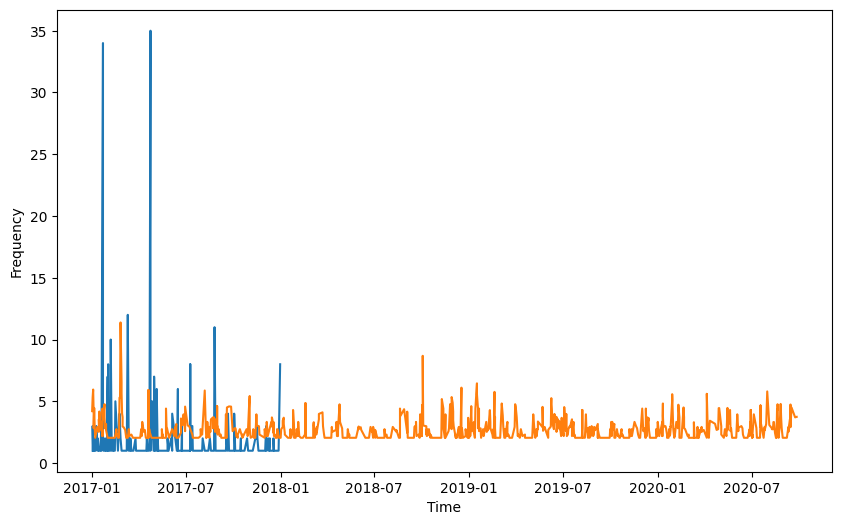

In [49]:
plt.figure(figsize=(10,6))

# Plot the counts
plt.plot(df1.loc['2017-01-01':'2020-01-01'], label='Original')
plt.plot(forecast_df[['y_pred']]['2017':'2020'], label='Forecast (Average)')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()